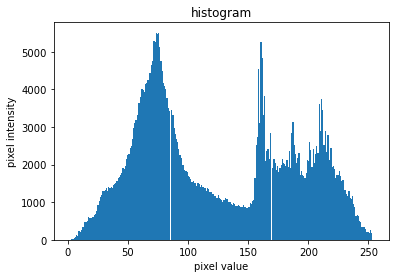

thresholding result:  130.47647058823532


-1

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('1j.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(800,600))
#plt.imshow(img)
bins_num = 255
hist, bin_edges = np.histogram(img, bins=bins_num)
plt.hist(img.ravel(),256)
plt.xlabel('pixel value')
plt.ylabel('pixel intensity')
plt.title('histogram')
plt.show()

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)
threshold = bin_mids[:-1][index_of_max_val]
print("thresholding result: ", threshold)
(tresh, Bin) = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
cv2.imshow('Binary',Bin)
cv2.waitKey(0)


[ 58  96 143 192]


C:\Users\PUKHRAJ\anaconda3\lib\site-packages\skimage\util\dtype.py:525: UserWarning: Downcasting int64 to uint8 without scaling because max value 4 fits in uint8
  return _convert(image, np.uint8, force_copy)


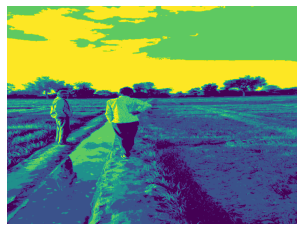

In [2]:
from skimage import img_as_ubyte
from skimage.filters import threshold_multiotsu

Thresholds = threshold_multiotsu(img,classes = 5)
print(Thresholds)
    
Regions = np.digitize(img, bins = Thresholds)
Final_Img = img_as_ubyte(Regions)
plt.imshow(Regions)
plt.axis('off')
plt.savefig('Multi-Ostu.jpg')

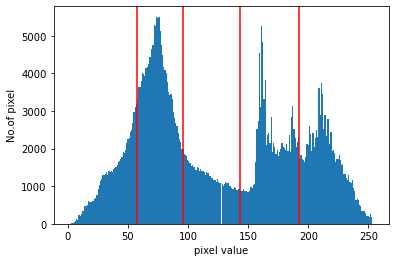

In [26]:
plt.hist(img.ravel(),bins = 255)
for thresh in Thresholds:
    plt.axvline(thresh, color = 'r')
plt.xlabel('pixel value')
plt.ylabel('No.of pixel')
plt.savefig('Multi-otsu Hist.jpg')